<a href="https://colab.research.google.com/github/LidiaDomingos/FindMaximalClique/blob/main/ProjetoFinalSuperComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Redes Sociais**

Disciplina: Super Computação - 7º semestre

Aluna: Lídia Alves Chagas Domingos

## **Encontrando o clique máximo em um gráfico.**

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png" width="600" height="350">

---








<p align="justify">A Análise de Redes Sociais (ARS) examina as relações entre atores sociais com base em conexões, em vez de características individuais. A ideia de que os membros estão mais próximos um do outro em um grafo é fundamental. Embora seja difícil computacionalmente encontrar o clique máximo em um grafo, é essencial na ARS para encontrar grupos coesos. Em áreas como ciência da computação e análise de redes sociais, os cliques promovem comportamentos uniformes e trocas rápidas de informações.

#### *Objetivo*
<p align="justify"> O propósito do projeto é a partir de um código base, conseguir implementar uma busca exaustiva que ache o clique máximo em um grafo, e analisar os recursos que precisam, o tempo gasto, entre outros. Além disso, mostrar outras opções que utilizam menos recursos do que a busca global, explicar o porque elas servem, e implementar formas de melhorias de processamento, como a paralelização com OpenMP e MPI.



Código base dado de busca:

In [307]:
%%writefile initialFind.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

vector<int> FindMaxClique(vector<vector<int>> &graph, int numVer){

    vector<int> maxClique;
    vector<int> possibles;

    for (int clique = 0; clique < numVer; clique++){
        possibles.push_back(clique);
    }

    while (!possibles.empty()){
        int lastClique = possibles.back();
        possibles.pop_back();

        bool canAdd = true;

        for (int u : maxClique){
            if (graph[u][lastClique] == 0){
                canAdd = false;
                break;
            }
        }

        if (canAdd == true){
            maxClique.push_back(lastClique);
            vector<int> newPossibles;

            for (int u : possibles){
                bool isAdjacent = true;

                for (int c: maxClique){
                    if (graph[u][c] == 0){
                        isAdjacent = false;
                        break;
                    }
                }

                if (isAdjacent){
                    newPossibles.push_back(u);
                }
            }

            possibles = newPossibles;
        }
    }

    return maxClique;
}

int main(int argc, char* argv[]){
    int numVer;
    vector<vector<int>> graph;

    graph = LerGrafo(argv[1], numVer);

    vector<int> maxClique;

    maxClique = FindMaxClique(graph, numVer);

    cout << "Clique máximo achado com uma busca que pega o último vértice: " << endl;

    for (auto el : maxClique){
        cout << el << " ";
    }
    return 0;

}

Overwriting initialFind.cpp


In [308]:
%%shell
g++ -Wall -O3 initialFind.cpp -o initialFind

<p align="justify">Considerando um grafo inicial de 50 vértices para fazer as primeiras comparações:

In [300]:
#Função para gerar os grafos
import networkx as nx
import random
from sys import *

def generateGraph(num_vertices):
    probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

    # Crie um grafo aleatório densamente conectado
    grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

    # Nome do arquivo de saída
    nome_arquivo = f"graph{num_vertices}.txt"

    # Abra o arquivo para escrita
    with open(nome_arquivo, 'w') as arquivo:
        # Escreva a quantidade de vértices e número de arestas na primeira linha
        arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

        # Escreva as arestas no formato de lista de adjacência
        for aresta in grafo.edges():
            arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

    print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

In [310]:
generateGraph(50)

Grafo densamente conectado gerado e salvo em 'graph50.txt'.


In [311]:
!./initialFind graph50.txt

Clique máximo achado com uma busca que pega o último vértice: 
49 46 45 42 39 33 25 24 21 

Clique máximo achado pelo algoritmo em python disponibilizado pelos professores (verifyMaxClique):

In [312]:
import networkx as nx
from sys import *

def verifyMaxClique(num_vertices):
  # Nome do arquivo de entrada
  nome_arquivo = f"graph{num_vertices}.txt"

  # Abrir o arquivo e pular a primeira linha
  with open(nome_arquivo, 'r') as arquivo:
      next(arquivo)  # Pula a primeira linha

      # Lê o grafo a partir das linhas restantes
      G = nx.parse_adjlist(arquivo)

  # Encontrar todas as cliques maximais
  cliques_maximais = list(nx.find_cliques(G))
  # Encontrar a clique máxima (a maior)
  clique_maxima = max(cliques_maximais, key=len)

  return clique_maxima

In [313]:
print(f"Clique máximo achado: {verifyMaxClique(50)},\nTamanho: {len(verifyMaxClique(50))}")

Clique máximo achado: ['47', '34', '44', '12', '40', '20', '14', '22', '32', '38', '45', '31', '30'],
Tamanho: 13


Observando essa diferença, se busca implementações melhores para se obter o melhor resultado com maior eficiência.

**1.   Abordagem Exaustiva**

In [314]:
%%writefile exaustFind.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

void FindMaxClique(vector<vector<int>>& graph, vector<int>& possibles, vector<int>& currentClique, vector<int>& maxClique){

    bool canAdd = true;

    if (!possibles.empty()){
      int lastClique = possibles.back();
      possibles.pop_back();
      currentClique.push_back(lastClique);

      vector<int> newPossibles;

      for (int cliquePossible : possibles){
        if (graph[lastClique][cliquePossible] == 1){
          newPossibles.push_back(cliquePossible);
        }
      }

      FindMaxClique(graph, newPossibles, currentClique, maxClique);
      currentClique.pop_back();
      FindMaxClique(graph, possibles, currentClique, maxClique);
      possibles.push_back(lastClique);

    }
    else {
      int size = currentClique.size();
      if (currentClique.size() > maxClique.size()){
        for (int i = 0; i < size; ++i) {
          for (int j = i + 1; j < size; ++j) {
              if (graph[currentClique[i]][currentClique[j]] == 0) {
                  canAdd = false;
                  break;
              }
          }
        }
        if (canAdd){
          maxClique = currentClique;
        }
      }
    }

}

int main(int argc, char* argv[]){
    int numVer;
    vector<vector<int>> graph;

    graph = LerGrafo(argv[1], numVer);
    vector<int> currentClique;
    vector<int> possibles;
    vector<int> maxClique;

    for (int clique = 0; clique < numVer; clique++){
        possibles.push_back(clique);
    }

    FindMaxClique(graph, possibles, currentClique, maxClique);

    cout << "Clique máximo (tamanho " << maxClique.size() <<") achado com uma busca exaustiva: " << endl;

    for (int el : maxClique){
        //adicionando 1 para bater com o resultado do verifyClique
        cout << el + 1 << " ";
    }
    return 0;
}

Overwriting exaustFind.cpp


In [315]:
%%shell
g++ -Wall -O3 -g exaustFind.cpp -o exaustFind

In [316]:
%%shell
./exaustFind graph50.txt

Clique máximo (tamanho 13) achado com uma busca exaustiva: 
47 45 44 40 38 34 32 31 30 22 20 14 12 

<p align="justify">É possível ver que com uma busca exaustiva, que considera todas as possibilidades, foi possível achar o mesmo tamanho de clique! Para observar melhor como esse algoritmo funciona, pode-se aumentar número de vértices e consequentemente aumentar também o número de arestas:

In [328]:
import matplotlib.pyplot as plt
import subprocess
import time

init = 50
end = 150
interval = 5

sizeSimple = []
timeSimple = []
sizeExaust = []
timeExaust = []
quantityVer = []

for i in range(init, end, interval):
  generateGraph(i)

  # ---- Busca Simples ----
  startTime = time.perf_counter()
  result = subprocess.run(['./initialFind', f"graph{i}.txt"], text=True, capture_output=True)
  endTime = time.perf_counter()
  timeSimple.append((endTime - startTime)/60)
  result = result.stdout.split(":")[1].rstrip().lstrip(" \n").replace(" ", ",")
  resultList = [int(valor) for valor in result.split(',')]
  sizeSimple.append(len(resultList))

  # ---- Busca Exaustiva ----
  startTime = time.perf_counter()
  result = subprocess.run(['./exaustFind', f"graph{i}.txt"], text=True, capture_output=True)
  endTime = time.perf_counter()
  timeExaust.append((endTime - startTime)/60)
  result = result.stdout.split(":")[1].rstrip().lstrip(" \n").replace(" ", ",")
  resultList = [int(valor) for valor in result.split(',')]
  sizeExaust.append(len(resultList))

  quantityVer.append(i)


Grafo densamente conectado gerado e salvo em 'graph50.txt'.
Grafo densamente conectado gerado e salvo em 'graph55.txt'.
Grafo densamente conectado gerado e salvo em 'graph60.txt'.
Grafo densamente conectado gerado e salvo em 'graph65.txt'.
Grafo densamente conectado gerado e salvo em 'graph70.txt'.
Grafo densamente conectado gerado e salvo em 'graph75.txt'.
Grafo densamente conectado gerado e salvo em 'graph80.txt'.
Grafo densamente conectado gerado e salvo em 'graph85.txt'.
Grafo densamente conectado gerado e salvo em 'graph90.txt'.
Grafo densamente conectado gerado e salvo em 'graph95.txt'.
Grafo densamente conectado gerado e salvo em 'graph100.txt'.
Grafo densamente conectado gerado e salvo em 'graph105.txt'.
Grafo densamente conectado gerado e salvo em 'graph110.txt'.
Grafo densamente conectado gerado e salvo em 'graph115.txt'.
Grafo densamente conectado gerado e salvo em 'graph120.txt'.
Grafo densamente conectado gerado e salvo em 'graph125.txt'.
Grafo densamente conectado gerado 

In [329]:
sizeCorrect = []
timeCorrect = []

for i in range(init, end, interval):
  startTime = time.perf_counter()
  sizeCorrect.append(len(verifyMaxClique(i)))
  endTime = time.perf_counter()
  timeCorrect.append((endTime - startTime)/60)
  print(f"Finalizado gráfico com {i} vértices!")

Finalizado gráfico com 50 vértices!
Finalizado gráfico com 55 vértices!
Finalizado gráfico com 60 vértices!
Finalizado gráfico com 65 vértices!
Finalizado gráfico com 70 vértices!
Finalizado gráfico com 75 vértices!
Finalizado gráfico com 80 vértices!
Finalizado gráfico com 85 vértices!
Finalizado gráfico com 90 vértices!
Finalizado gráfico com 95 vértices!
Finalizado gráfico com 100 vértices!
Finalizado gráfico com 105 vértices!
Finalizado gráfico com 110 vértices!
Finalizado gráfico com 115 vértices!
Finalizado gráfico com 120 vértices!
Finalizado gráfico com 125 vértices!
Finalizado gráfico com 130 vértices!
Finalizado gráfico com 135 vértices!
Finalizado gráfico com 140 vértices!
Finalizado gráfico com 145 vértices!


In [330]:
#Guardar os valores, devido a demora para rodar a célula.
print(f'''
  Tamanho da busca simples:   {sizeSimple},\n  Tempo: {timeSimple} ; \n
  Tamanho da busca exaustiva: {sizeExaust},\n  Tempo: {timeExaust} ; \n
  Tamanho da busca python:    {sizeCorrect},\n  Tempo: {timeCorrect} ; \n
''')


  Tamanho da busca simples:   [8, 8, 9, 9, 6, 10, 10, 9, 10, 10, 9, 9, 12, 10, 10, 12, 12, 11, 11, 10],
  Tempo: [4.748611663671909e-05, 4.188524999335641e-05, 4.7385683319589586e-05, 4.134770000140027e-05, 5.624645000352757e-05, 4.078441664508622e-05, 4.1691383315386096e-05, 5.199738334340509e-05, 5.94305332924705e-05, 6.319526661779188e-05, 6.372443331201794e-05, 5.509209998611671e-05, 6.0049033345421775e-05, 5.171014994023911e-05, 7.149818338803016e-05, 6.121275000623428e-05, 6.300196667628674e-05, 6.852801664839111e-05, 5.36487333495946e-05, 5.943599996195796e-05] ; 

  Tamanho da busca exaustiva: [12, 11, 13, 13, 12, 12, 14, 15, 14, 14, 15, 15, 15, 15, 16, 15, 16, 17, 16, 16],
  Tempo: [0.00027373248328027935, 0.0002542868166832098, 0.001048137166678013, 0.001317827249962041, 0.0008282568833237747, 0.002241287399980744, 0.004310043533344772, 0.008340243966692166, 0.015636103716618284, 0.037991041499966134, 0.03974153874999805, 0.03337928433332612, 0.062185916400024625, 0.11815944

Para checarmos se está sendo realmente o maior clique, podemos visualizar também por meio de uma gráfico:

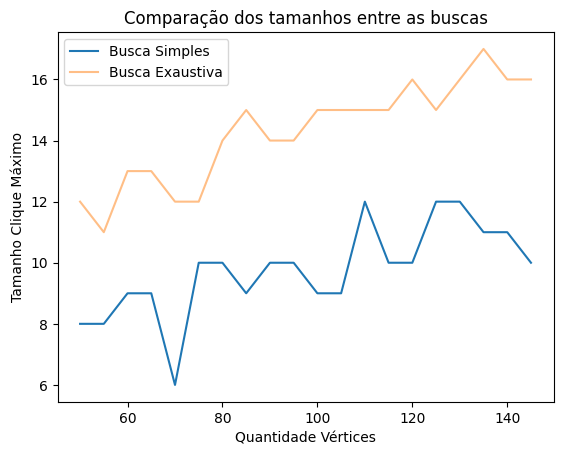

In [331]:
plt.title("Comparação dos tamanhos entre as buscas")
plt.plot(quantityVer, sizeSimple, label = "Busca Simples")
plt.plot(quantityVer, sizeExaust, label = "Busca Exaustiva", alpha=0.5)
plt.xlabel("Quantidade Vértices")
plt.ylabel("Tamanho Clique Máximo")
plt.legend()
plt.show()

Para melhor visualização ainda, dado que a exaustiva deu 100% de acurácia com o código em python:

In [332]:
from tabulate import tabulate
dados = []
for i in range(0,len(sizeSimple)):
  dados.append([sizeSimple[i], sizeExaust[i], sizeCorrect[i]])
print("Comparação entre tamanhos")
print(tabulate(dados, headers=["Busca Simples", "Busca Exaustiva", "Busca Python"], tablefmt="fancy_grid"))

Comparação entre tamanhos
╒═════════════════╤═══════════════════╤════════════════╕
│   Busca Simples │   Busca Exaustiva │   Busca Python │
╞═════════════════╪═══════════════════╪════════════════╡
│               8 │                12 │             12 │
├─────────────────┼───────────────────┼────────────────┤
│               8 │                11 │             11 │
├─────────────────┼───────────────────┼────────────────┤
│               9 │                13 │             13 │
├─────────────────┼───────────────────┼────────────────┤
│               9 │                13 │             13 │
├─────────────────┼───────────────────┼────────────────┤
│               6 │                12 │             12 │
├─────────────────┼───────────────────┼────────────────┤
│              10 │                12 │             12 │
├─────────────────┼───────────────────┼────────────────┤
│              10 │                14 │             14 │
├─────────────────┼───────────────────┼────────────────┤
│    

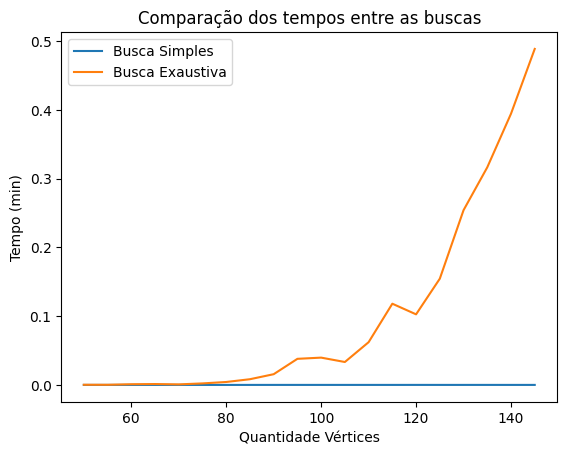

In [333]:
plt.title("Comparação dos tempos entre as buscas")
plt.plot(quantityVer, timeSimple, label = "Busca Simples")
plt.plot(quantityVer, timeExaust, label = "Busca Exaustiva")
plt.xlabel("Quantidade Vértices")
plt.ylabel("Tempo (min)")
plt.legend()
plt.show()

<p align="justify">Com essas comparações, é possível observar o tempo gasto que precisa na exaustiva, devido ao grande número de verificações que ela faz, por mais que ela seja 100% de acurácia, a partir do momento que vai se aumentando o número de vértices, acaba precisando de muito tempo, de forma que, por exemplo, com tamanho de vértices de 200-220 precisa de mais de 20 minutos rodando, e assim o tempo sobre exponencialmente, conforme pode-se ver no gráfico. Por isso, pode-se pensar em modelos alternativas, como heurísticas.

<p align="justify">Heurísticas são métodos úteis e funcionais para resolver problemas difíceis em um curto período de tempo. Elas se destacam por serem fáceis de usar, eficientes e capazes de resolver uma ampla gama de problemas. Algoritmos exatos encontram a solução ideal, mas as heurísticas encontram soluções aceitáveis rapidamente. Isso os torna úteis em situações em que encontrar a solução ideal é impraticável. Embora as soluções heurísticas não sejam as melhores, elas geralmente são suficientes para várias aplicações práticas.

Para isso, foi pensado na seguinte heuristica gulosa para o código base de busca local, mudando apenas a função:



    Função FindMaxClique(graph, numVer):
        maxClique = []
        possibles = []

        // Inicialize os possíveis vértices com todos os vértices do grafo
        Para cada vértice em grafo:
            Adicionar vértice a possibles

        Enquanto possibles não está vazio:
            // Escolha o vértice de maior grau entre os possíveis
            maxDegreeVertex = -1
            maxDegree = -1

            Para cada vértice em possibles:
                grau = Contar arestas do vértice no grafo
                Se grau > maxDegree:
                    maxDegree = grau
                    maxDegreeVertex = vértice

            // Remova o vértice escolhido dos possíveis
            Remover maxDegreeVertex de possibles

            // Verifique se o vértice pode ser adicionado ao clique
            canAdd = Verdadeiro
            Para cada vértice em maxClique:
                Se não há aresta entre maxDegreeVertex e vértice:
                    canAdd = Falso
                    end loop

            // Se puder ser adicionado, adicione-o e atualize os possíveis vértices
            Se canAdd:
                Adicionar maxDegreeVertex a maxClique
                newPossibles = []

                Para cada vértice em possiveisVertices:
                    isAdjacent = Verdadeiro

                    Para cada vérticeClique em maxClique:
                        Se não há aresta entre vértice e vérticeClique:
                            isAdjacent = Falso
                            Parar loop

                    Se isAdjacent:
                        Adicionar vértice a newPossibles

                possibles = newPossibles

        Retornar maxClique



<p align="justify"> A ideia dessa heuristica é de grau nos vértices, ou seja, que os vértices que estiverem mais ligados a outros vértices podem oferecer o clique máximo. Parte-se do principio

**2.  Abordagem com Paralelização OpenMP**


<p align="justify"> Paralelização com OpenMP é útil porque permite an execução simultânea de componentes independentes de um programa usando processadores multicore. Um padrão industrial amplamente aceito, isso acelera o desempenho, oferece escalabilidade, é fácil de implementar, é flexível e possui baixo overhead em termos de complexidade e custo de execução. Essa técnica é eficaz para melhorar o desempenho de tarefas com computadores em sistemas com mais de um núcleo.








In [ ]:
!apt-get install valgrind --fix-missing

Utilizei o valgrind para encontrar pontos que podem me dar uma melhora no tempo caso tenha uma paralelização.

In [189]:
!valgrind --tool=callgrind ./exaustFind graph50.txt

==56684== Callgrind, a call-graph generating cache profiler
==56684== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==56684== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==56684== Command: ./exaustFind graph50.txt
==56684== 
==56684== For interactive control, run 'callgrind_control -h'.
Clique máximo (tamanho 12) achado com uma busca exaustiva: 
50 47 44 42 41 39 30 22 13 9 2 1 ==56684== 
==56684== Events    : Ir
==56684== Collected : 135073258
==56684== 
==56684== I   refs:      135,073,258


In [190]:
!callgrind_annotate callgrind.out.56684 exaustFind.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.56684' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 25261694
Trigger: Program termination
Profiled target:  ./exaustFind graph50.txt (PID 56684, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   exaustFind.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                   
--------------------------------------------------------------------------------
135,073,258 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
29,652,592 (21.95%)  exaustFind.

Encontrei os dois for's juntos como um bom ponto para paralelização!

In [334]:
%%writefile exaustFindOMP.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <omp.h>

using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

void FindMaxClique(vector<vector<int>>& graph, vector<int>& possibles, vector<int>& currentClique, vector<int>& maxClique){

    bool canAdd = true;

    if (!possibles.empty()){
      int lastClique = possibles.back();
      possibles.pop_back();
      currentClique.push_back(lastClique);

      vector<int> newPossibles;

      for (int i = 0; i < possibles.size(); ++i){
        int cliquePossible = possibles[i];
        if (graph[lastClique][cliquePossible] == 1){
          newPossibles.push_back(cliquePossible);
        }
      }

      FindMaxClique(graph, newPossibles, currentClique, maxClique);
      currentClique.pop_back();
      FindMaxClique(graph, possibles, currentClique, maxClique);
      possibles.push_back(lastClique);
    }
    else {
      int size = currentClique.size();
      if (currentClique.size() > maxClique.size()){
        #pragma omp parallel for shared(canAdd) collapse(2)
        for (int i = 0; i < size; ++i) {
          for (int j = i + 1; j < size; ++j) {
              if (graph[currentClique[i]][currentClique[j]] == 0) {
                  canAdd = false;
              }
          }
        }
        if (canAdd){
          maxClique = currentClique;
        }
      }
    }
}

int main(int argc, char* argv[]){
    int numVer;
    vector<vector<int>> graph;

    graph = LerGrafo(argv[1], numVer);
    vector<int> currentClique;
    vector<int> possibles;
    vector<int> maxClique;

    omp_set_num_threads(8);

    for (int clique = 0; clique < numVer; clique++){
        possibles.push_back(clique);
    }

    FindMaxClique(graph, possibles, currentClique, maxClique);

    cout << "Clique máximo (tamanho " << maxClique.size() <<") achado com uma busca exaustiva: " << endl;

    for (int el : maxClique){
        //adicionando 1 para bater com o resultado do verifyClique
        cout << el + 1 << " ";
    }
    return 0;
}


Overwriting exaustFindOMP.cpp


In [335]:
%%shell
g++ -fopenmp exaustFindOMP.cpp -o exaustFindOMP

In [336]:
%%shell
./exaustFindOMP graph50.txt

Clique máximo (tamanho 12) achado com uma busca exaustiva: 
47 42 38 36 34 28 27 19 16 15 3 1 

In [337]:
sizeOMP = []
timeOMP = []

for i in range(init, end, interval):
  print(f"No grafo {i}")
  # ---- Busca Exaust OMP ----
  startTime = time.perf_counter()
  result = subprocess.run(['./exaustFindOMP', f"graph{i}.txt"], text=True, capture_output=True)
  endTime = time.perf_counter()
  timeOMP.append((endTime - startTime)/60)
  result = result.stdout.split(":")[1].rstrip().lstrip(" \n").replace(" ", ",")
  resultList = [int(valor) for valor in result.split(',')]
  sizeOMP.append(len(resultList))


No grafo 50
No grafo 55
No grafo 60
No grafo 65
No grafo 70
No grafo 75
No grafo 80
No grafo 85
No grafo 90
No grafo 95
No grafo 100
No grafo 105
No grafo 110
No grafo 115
No grafo 120
No grafo 125
No grafo 130
No grafo 135
No grafo 140
No grafo 145


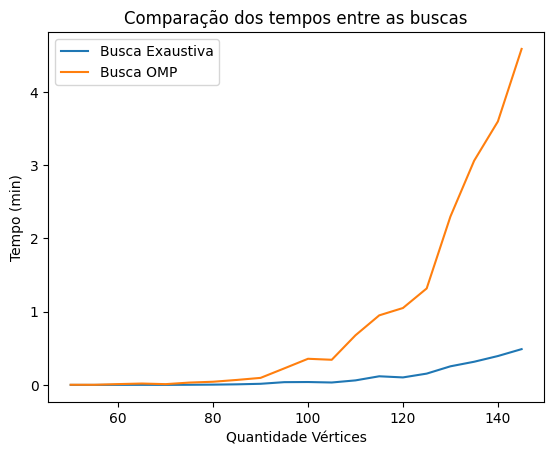

In [338]:
plt.title("Comparação dos tempos entre as buscas")
plt.plot(quantityVer, timeExaust, label = "Busca Exaustiva")
plt.plot(quantityVer, timeOMP, label = "Busca OMP")
plt.xlabel("Quantidade Vértices")
plt.ylabel("Tempo (min)")
plt.legend()
plt.show()

In [344]:
#Observar o speedUp
dados = []

for i in range(0,len(timeExaust)):
  dados.append([quantityVer[i],timeExaust[i], timeOMP[i], (timeExaust[i]/timeOMP[i])])

print("Comparação entre tamanhos")
print(tabulate(dados, headers=["Vértices","Busca Exaustiva", "Busca Exaustiva OMP", "Speed Up"], tablefmt="fancy_grid"))

Comparação entre tamanhos
╒════════════╤═══════════════════╤═══════════════════════╤════════════╕
│   Vértices │   Busca Exaustiva │   Busca Exaustiva OMP │   Speed Up │
╞════════════╪═══════════════════╪═══════════════════════╪════════════╡
│         50 │       0.000273732 │            0.00247137 │  0.110761  │
├────────────┼───────────────────┼───────────────────────┼────────────┤
│         55 │       0.000254287 │            0.00215941 │  0.117758  │
├────────────┼───────────────────┼───────────────────────┼────────────┤
│         60 │       0.00104814  │            0.011427   │  0.091725  │
├────────────┼───────────────────┼───────────────────────┼────────────┤
│         65 │       0.00131783  │            0.0192072  │  0.0686112 │
├────────────┼───────────────────┼───────────────────────┼────────────┤
│         70 │       0.000828257 │            0.0107557  │  0.0770066 │
├────────────┼───────────────────┼───────────────────────┼────────────┤
│         75 │       0.00224129  │    

**3.  Utilização de MPI (Message Passing Interface)**


<p align="justify"> O protocolo de programação conhecido como Interface de Envio de Mensagens (MPI) facilita a comunicação entre processos em sistemas distribuídos ou grupos de computadores. Ele permite que vários componentes de um programa paralelo, que podem estar em vários computadores, troquem mensagens para organizar suas atividades. Aplicações científicas e de engenharia que requerem muita computação, como simulações complexas, usam comumente o MPI. Ele fornece uma interface padronizada que permite que os desenvolvedores desenvolvam programas paralelos eficazes em ambientes de computação de alto desempenho.

<p align="justify"> Inicialmente, comecei com o seguinte código para a implementação do MPI:

In [ ]:
%%writefile exaustFindMPI.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <mpi.h>
#include <chrono>

using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

bool isChecked(vector<int>& currentClique, vector<vector<int>>& graph){
    int sizeClique = currentClique.size();
    for (int i = 0; i < sizeClique; ++i) {
          for (int j = i + 1; j < sizeClique; ++j) {
              if (graph[currentClique[i]][currentClique[j]] == 0) {
                  return false;
              }
          }
    }
    return true;
}

void FindMaxClique(vector<vector<int>>& graph, vector<int>& possibles, vector<int>& currentClique, vector<int>& maxClique){

    bool canAdd = true;

    if (!possibles.empty()){
      int lastClique = possibles.back();
      possibles.pop_back();
      currentClique.push_back(lastClique);

      vector<int> newPossibles;

      for (int cliquePossible : possibles){
        if (graph[lastClique][cliquePossible] == 1){
          newPossibles.push_back(cliquePossible);
        }
      }

      FindMaxClique(graph, newPossibles, currentClique, maxClique);
      currentClique.pop_back();
      FindMaxClique(graph, possibles, currentClique, maxClique);
      possibles.push_back(lastClique);

    }
    else {
      int size = currentClique.size();
      if (currentClique.size() > maxClique.size()){
        int sizeClique = currentClique.size();
        for (int i = 0; i < sizeClique; ++i) {
              for (int j = i + 1; j < sizeClique; ++j) {
                  if (graph[currentClique[i]][currentClique[j]] == 0) {
                      canAdd = false;
                  }
              }
        }
        if (canAdd){
          maxClique = currentClique;
        }
      }
    }

}

int main(int argc, char** argv) {

    chrono::high_resolution_clock::time_point startTime;
    chrono::high_resolution_clock::time_point endTime;

    int numVer;
    vector<vector<int>> graph;

    vector<int> currentClique;
    vector<int> possibles;
    vector<int> maxClique;

    MPI_Init(&argc, &argv);
    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    if(rank == 0) {

      startTime = chrono::high_resolution_clock::now();

      graph = LerGrafo(argv[1], numVer);

      MPI_Bcast(&numVer, 1, MPI_INT, 0, MPI_COMM_WORLD);

      for (int i = 0; i < numVer; ++i) {
        MPI_Bcast(graph[i].data(), numVer, MPI_INT, 0, MPI_COMM_WORLD);
      }

    }
    else {
      MPI_Bcast(&numVer, 1, MPI_INT, 0, MPI_COMM_WORLD);
      graph.resize(numVer, vector<int>(numVer, 0));
      for (int i = 0; i < numVer; ++i) {
          MPI_Bcast(graph[i].data(), numVer, MPI_INT, 0, MPI_COMM_WORLD);
      }
    }

    for (int clique = 0; clique < numVer; clique++){
        possibles.push_back(clique);
    }

    FindMaxClique(graph, possibles, currentClique, maxClique);

    if(rank != 0){
      MPI_Send(maxClique.data(), numVer, MPI_INT, 0, 0, MPI_COMM_WORLD);
    }
    else{
      vector<int> tempCliqueMax(numVer, 0);
      bool canAdd2 = true;
      for (int i = 1; i < size; ++i) {
        MPI_Recv(tempCliqueMax.data(), numVer, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
        if (tempCliqueMax.size() > maxClique.size()){
          int sizeClique = tempCliqueMax.size();
          for (int i = 0; i < sizeClique; ++i) {
                for (int j = i + 1; j < sizeClique; ++j) {
                    if (graph[tempCliqueMax[i]][tempCliqueMax[j]] == 0) {
                        canAdd2 = false;
                    }
                }
          }
          if (canAdd2){
            maxClique = currentClique;
          }
        }
      }

      cout << "Clique máximo (tamanho " << maxClique.size() <<") achado com uma busca exaustiva: " << endl;

      for (int el : maxClique){
        //adicionando 1 para bater com o resultado do verifyClique
        cout << el + 1 << " ";
      }

      endTime = chrono::high_resolution_clock::now();
      chrono::duration<double> timeMPI = endTime - startTime;
      cout << endl;
      cout << timeMPI.count() << " seconds!" << endl;

    }

    MPI_Finalize();
    return 0;
}

<p align="justify"> Para compilar, utilizei:

    mpic++ exaustFindMPI.cpp -o exaustFindMPI

<p align="justify"> A topologia que usei foi: 3 tarefas para rodar em dois nós, ou seja, no compute00 e compute01.

    %%exaustFindMPI.slurm
    #!/bin/bash  
    #!/bin/bash  
    #SBATCH --job-name=exaustFindMPI
    #SBATCH -N 2
    #SBATCH --ntasks=2    
    #SBATCH --partition=normal

    mpirun -np 2 ./exaustFindMPI graph50.txt

<p align="justify"> Porém, o código em cpp acima não funcionou. Ao ver a saída e tentar debugar, percebi alguns pontos que poderiam estar causando a falha de comunicação. A saída do job foi a seguinte:

    [compute00:07701] *** Process received signal ***
    [compute00:07701] Signal: Segmentation fault (11)
    [compute00:07701] Signal code: Address not mapped (1)
    [compute00:07701] Failing at address: 0x3ea6fa0
    [compute00:07701] [ 0] /lib64/libpthread.so.0(+0xf5f0)[0x7f503850c5f0]
    [compute00:07701] [ 1] ./exaustFindMPI[0x40996e]
    [compute00:07701] [ 2] /lib64/libc.so.6(__libc_start_main+0xf5)[0x7f5038151505]
    [compute00:07701] [ 3] ./exaustFindMPI[0x408e49]
    [compute00:07701] *** End of error message ***
    --------------------------------------------------------------------------
    Primary job  terminated normally, but 1 process returned
    a non-zero exit code. Per user-direction, the job has been aborted.
    --------------------------------------------------------------------------
    --------------------------------------------------------------------------
    mpirun noticed that process rank 0 with PID 0 on node compute00 exited on signal 11 (Segmentation fault).
    --------------------------------------------------------------------------

<p align="justify"> Ao observar meu código, percebi algumas coisas que poderiam estar tanto problema, como as variáveis canAdd e canAdd2, e o break existente nessa parte de checagem do clique no código. Por isso, mudei para a seguinte forma:

In [345]:
%%writefile exaustFindMPI.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <mpi.h>
#include <chrono>

using namespace std;

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;

    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // O grafo é não direcionado
    }

    arquivo.close();

    return grafo;
}

bool isChecked(vector<int>& currentClique, vector<vector<int>>& graph){
    int sizeClique = currentClique.size();
    for (int i = 0; i < sizeClique; ++i) {
          for (int j = i + 1; j < sizeClique; ++j) {
              if (graph[currentClique[i]][currentClique[j]] == 0) {
                  return false;
              }
          }
    }
    return true;
}

void FindMaxClique(vector<vector<int>>& graph, vector<int>& possibles, vector<int>& currentClique, vector<int>& maxClique){

    bool canAdd = true;

    if (!possibles.empty()){
      int lastClique = possibles.back();
      possibles.pop_back();
      currentClique.push_back(lastClique);

      vector<int> newPossibles;

      for (int cliquePossible : possibles){
        if (graph[lastClique][cliquePossible] == 1){
          newPossibles.push_back(cliquePossible);
        }
      }

      FindMaxClique(graph, newPossibles, currentClique, maxClique);
      currentClique.pop_back();
      FindMaxClique(graph, possibles, currentClique, maxClique);
      possibles.push_back(lastClique);

    }
    else {
      int size = currentClique.size();
      if (currentClique.size() > maxClique.size() && isChecked(currentClique, graph)){
        maxClique = currentClique;
      }
    }

}

int main(int argc, char** argv) {

    chrono::high_resolution_clock::time_point startTime;
    chrono::high_resolution_clock::time_point endTime;

    int numVer;
    vector<vector<int>> graph;

    vector<int> possibles;

    vector<int> currentClique;
    vector<int> maxClique;

    MPI_Init(&argc, &argv);
    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    if(rank == 0) {

      startTime = chrono::high_resolution_clock::now();

      graph = LerGrafo(argv[1], numVer);

      MPI_Bcast(&numVer, 1, MPI_INT, 0, MPI_COMM_WORLD);

      for (int i = 0; i < numVer; ++i) {
        MPI_Bcast(graph[i].data(), numVer, MPI_INT, 0, MPI_COMM_WORLD);
      }

    }
    else {
      MPI_Bcast(&numVer, 1, MPI_INT, 0, MPI_COMM_WORLD);
      graph.resize(numVer, vector<int>(numVer, 0));
      for (int i = 0; i < numVer; ++i) {
          MPI_Bcast(graph[i].data(), numVer, MPI_INT, 0, MPI_COMM_WORLD);
      }
    }

    for (int clique = 0; clique < numVer; clique++){
        possibles.push_back(clique);
    }

    FindMaxClique(graph, possibles, currentClique, maxClique);

    if(rank != 0){
      MPI_Send(maxClique.data(), numVer, MPI_INT, 0, 0, MPI_COMM_WORLD);

    }
    else{
      vector<int> tempCliqueMax(numVer, 0);

      for (int i = 1; i < size; ++i) {
        MPI_Recv(tempCliqueMax.data(), numVer, MPI_INT, i, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
        if (tempCliqueMax.size() > maxClique.size() && isChecked(tempCliqueMax, graph)){
            maxClique = tempCliqueMax;
        }
      }

      cout << "Clique máximo (tamanho " << maxClique.size() <<") achado com uma busca exaustiva: " << endl;

      for (int el : maxClique){
        //adicionando 1 para bater com o resultado do verifyClique
        cout << el + 1 << " ";
      }

      endTime = chrono::high_resolution_clock::now();
      chrono::duration<double> timeMPI = endTime - startTime;
      cout << endl;
      cout << timeMPI.count() << " seconds!" << endl;

    }

    MPI_Finalize();
    return 0;
}

Writing exaustFindMPI.cpp


Assim, consegui rodar corretamente com o MPI, obtendo o seguinte resultado:

    [compute00.hpcnet:07890] pmix_mca_base_component_repository_open: unable to open mca_pnet_opa: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07890] mca_base_component_repository_open: unable to open mca_oob_ud: libosmcomp.so.3: cannot open shared object file: No such file or directory (ignored)
    [compute01.hpcnet:07523] pmix_mca_base_component_repository_open: unable to open mca_pnet_opa: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07901] pmix_mca_base_component_repository_open: unable to open mca_pnet_opa: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07902] pmix_mca_base_component_repository_open: unable to open mca_pnet_opa: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute01.hpcnet:07523] mca_base_component_repository_open: unable to open mca_oob_ud: libosmcomp.so.3: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07902] mca_base_component_repository_open: unable to open mca_oob_ud: libosmcomp.so.3: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07901] mca_base_component_repository_open: unable to open mca_oob_ud: libosmcomp.so.3: cannot open shared object file: No such file or directory (ignored)
    [compute01.hpcnet:07523] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07901] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07902] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute01.hpcnet:07523] mca_base_component_repository_open: unable to open mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute01.hpcnet:07523] mca_base_component_repository_open: unable to open mca_mtl_psm2: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07901] mca_base_component_repository_open: unable to open mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07902] mca_base_component_repository_open: unable to open mca_mtl_psm: libpsm_infinipath.so.1: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07901] mca_base_component_repository_open: unable to open mca_mtl_psm2: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    [compute00.hpcnet:07902] mca_base_component_repository_open: unable to open mca_mtl_psm2: libpsm2.so.2: cannot open shared object file: No such file or directory (ignored)
    Clique máximo (tamanho 12) achado com uma busca exaustiva:
    47 42 38 36 34 28 27 19 16 15 3 1
    0.316257 seconds!


Com esses resultados, rodei algumas vezes com os grafos de 50 a 120, com intervalo de 5 em 5 para vermos a diferença entre tempo!

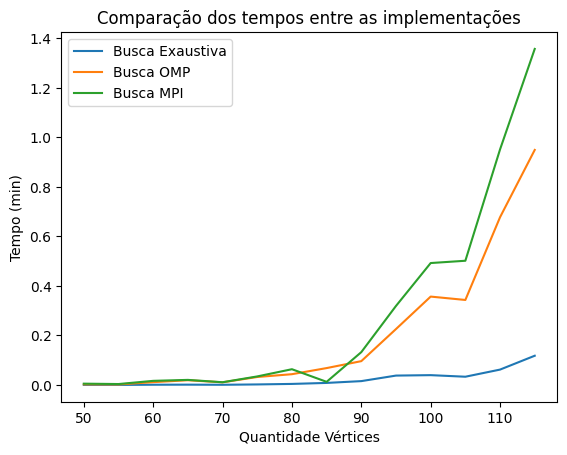

In [360]:
timeMPI = [
    0.320869,
    0.22847,
    1.00223,
    1.2354,
    0.666223,
    2.074,
    3.82247,
    0.762197,
    7.96444,
    19.1603,
    29.5588,
    30.1134,
    57.1045,
    81.4614
]

listTimeMPI = []
for i in timeMPI:
  listTimeMPI.append(i/60)

plt.title("Comparação dos tempos entre as implementações")
plt.plot(quantityVer[0:14], timeExaust[0:14], label = "Busca Exaustiva")
plt.plot(quantityVer[0:14], timeOMP[0:14], label = "Busca OMP")
plt.plot(quantityVer[0:14], listTimeMPI, label = "Busca MPI")
plt.xlabel("Quantidade Vértices")
plt.ylabel("Tempo (min)")
plt.legend()
plt.show()
